In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from keras.layers import Dense, Flatten, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split

from keras.models import model_from_json

import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input"))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'IdLookupTable.csv', 'SampleSubmission.csv', 'test', 'test.zip', 'training', 'training.zip']


In [50]:
train = pd.read_csv('input/training/training.csv')
test = pd.read_csv('input/test/test.csv')
lookid_data = pd.read_csv('input/IdLookupTable.csv')

In [51]:
train.head().T
# 30 labels(target variables) + 1 column of image pixels data

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [52]:
# converting image column data to reqd. numeric format and correct shape
ntrain = train.shape[0]
image = []
for i in range (0,ntrain):
    img = train_image[i].split(' ')
    img = [0 if x =='' else x for x in img]
    image.append(img)


In [53]:
image_list = np.array(image,dtype = 'float')
X = image_list.reshape(-1,96,96,1)
type(X)

numpy.ndarray

In [54]:
# scaling pixel values
X = X/255

In [55]:
def plot_pupils(image, left_x, left_y, right_x, right_y):
    plt.figure()
    plt.imshow(image,cmap='gray')
    plt.scatter(left_x, left_y, s=5, c='red', marker='o')
    plt.scatter(right_x, right_y, s=5, c='red', marker='o')
    plt.show()

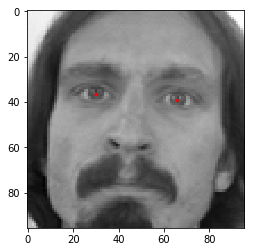

In [56]:
plot_pupils(X[0,:,:,0], 66, 39, 30, 36.5)

In [57]:
ntest = test.shape[0]
image = []
for i in range (0,ntest):
    img = test['Image'][i].split(' ')
    img = [0 if x =='' else x for x in img]
    image.append(img)
image_list = np.array(image,dtype = 'float')
test_data = image_list.reshape(-1,96,96,1)
test_data = test_data/255

In [58]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [59]:
#predicting test_data
y_pred = model.predict(test_data)

In [60]:
y_pred[0,:]

array([59.681545, 33.02375 , 27.458073, 34.48168 , 53.72179 , 34.234653,
       66.06556 , 33.590366, 33.56449 , 35.02834 , 20.578636, 35.56197 ,
       50.615322, 26.553715, 71.81781 , 26.699017, 35.625145, 27.408232,
       14.518087, 29.08593 , 45.09018 , 52.590275, 59.079494, 67.5261  ,
       31.051811, 68.92767 , 44.60036 , 65.3685  , 45.17987 , 73.778824],
      dtype=float32)

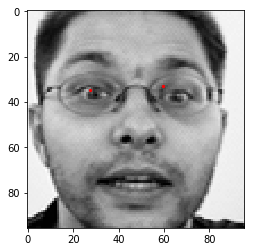

In [61]:
plot_pupils(test_data[0,:,:,0],y_pred[0,0], y_pred[0,1],y_pred[0,2], y_pred[0,3])